In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
boston.data.shape

(506, 13)

In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
import pandas as pd
bos =pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE']= boston.target
X = bos.drop('PRICE',axis = 1)
Y = bos['PRICE']

In [8]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaler.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
xtr = scaler.transform(X_train)
xte = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True,n_jobs = 7)
lr.fit(xtr,y_train)
pred = lr.predict(xte)

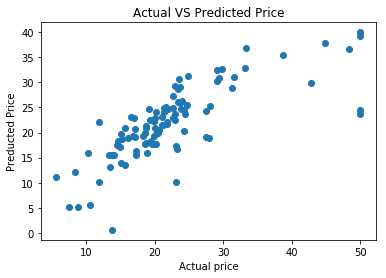

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_test,pred)
plt.xlabel('Actual price')
plt.ylabel('Preducted Price')
plt.title('Actual VS Predicted Price')
plt.show()

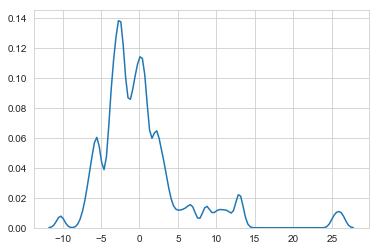

In [17]:
delta_y = y_test - pred
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),bw = 0.5)
plt.show()


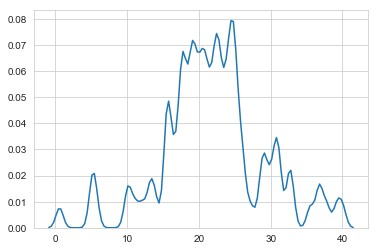

In [18]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(pred),bw = 0.5)
plt.show()

# Implementation of SGD with Linear Regression

In [65]:
def loss_f(m, b, X, y):
    total_Error = 0
    for i in range(0, len(X)): 
        x = X 
        y = y
        total_Error += (y[:,i] - (np.dot(x[i] , m) + b)) ** 2
    return total_Error / len(x)

In [68]:
 def linear_reg_sgd(w_present, b_present, X_train, Y_train,X_test, Y_test, learning_rate =0.0001,epochs = 100):
        
        deriv_m = 0 
        deriv_b = 0 
        training_loss = [] 
        testing_loss = []
        for j in range(1, epochs + 1): 
            y = np.asmatrix(Y_train)
            x = np.asmatrix(X_train)
            for i in range(len(x)):
                deriv_m += np.dot(-2*x[i].T , (y[:,i] - np.dot(x[i] , w_present) + b_present)) 
                deriv_b += -2*(y[:,i] - (np.dot(x[i] , w_present) + b_present))
            w1 = w_present - learning_rate * deriv_m 
            b1 = b_present - learning_rate * deriv_b
            if (w_present==w1).all(): 
                break
            else: 
                w_present = w1
                b_present = b1 
                learning_rate = learning_rate/2
            training_err = loss_f(w_present,b_present, x, y)
            training_loss.append(training_err)
            testing_err = loss_f(w_present, b_present, np.asmatrix(X_test), np.asmatrix(Y_test)) 
            testing_loss.append(testing_err)
            print("After {0} epoch training error = {1} and testing error = {2}".format(j, training_err, testing_err)) 
        return w_present, b_present, training_loss, testing_loss

In [51]:
w_present_random = np.random.rand(13)
w_present = np.asmatrix(w0_random).T
b_present= np.random.rand()


In [69]:
best_slop, best_intercept, training_loss, testing_loss = linear_reg_sgd(w_present, b_present, X_train, y_train,X_test, y_test)
print("Slop: {} \n y_intercept: {}".format(best_slop, best_intercept))


After 1 epoch training error = [[6.12396572e+13]] and testing error = [[6.36916347e+13]]
After 2 epoch training error = [[9.63188184e+21]] and testing error = [[1.00218684e+22]]
After 3 epoch training error = [[3.78640664e+29]] and testing error = [[3.93984677e+29]]
After 4 epoch training error = [[3.7194227e+36]] and testing error = [[3.87015817e+36]]
After 5 epoch training error = [[9.12531705e+42]] and testing error = [[9.49513674e+42]]
After 6 epoch training error = [[5.5863473e+48]] and testing error = [[5.81274403e+48]]
After 7 epoch training error = [[8.51687058e+53]] and testing error = [[8.86203203e+53]]
After 8 epoch training error = [[3.2212517e+58]] and testing error = [[3.3517987e+58]]
After 9 epoch training error = [[2.99893168e+62]] and testing error = [[3.12046876e+62]]
After 10 epoch training error = [[6.76344609e+65]] and testing error = [[7.03754686e+65]]
After 11 epoch training error = [[3.57381452e+68]] and testing error = [[3.71864976e+68]]
After 12 epoch training

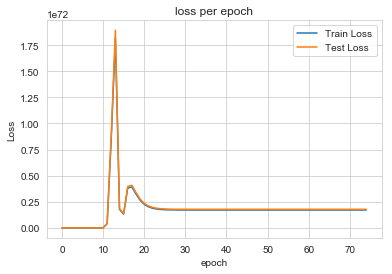

In [70]:
plt.figure() 
plt.plot(range(len(training_loss)), np.reshape(training_loss,[len(training_loss), 1]), label = "Train Loss")
plt.plot(range(len(testing_loss)), np.reshape(testing_loss, [len(testing_loss), 1]), label = "Test Loss")
plt.title("loss per epoch")
plt.xlabel("epoch") 
plt.ylabel("Loss")
plt.legend()
plt.show()
